<a href="https://colab.research.google.com/github/PikuFuka/CSEL-302-comp/blob/main/2B_SOTOMAYOR_EXER7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# **Part 1: Data Preprocessing**

# **Load the Dataset:**

In [ ]:
df = pd.read_csv("Netflix_Userbase.csv")
df

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month
...,...,...,...,...,...,...,...,...,...,...
2495,2496,Premium,14,25-07-22,12-07-23,Spain,28,Female,Smart TV,1 Month
2496,2497,Basic,15,04-08-22,14-07-23,Spain,33,Female,Smart TV,1 Month
2497,2498,Standard,12,09-08-22,15-07-23,United States,38,Male,Laptop,1 Month
2498,2499,Standard,13,12-08-22,12-07-23,Canada,48,Female,Tablet,1 Month


# **Missing Values:**

In [ ]:
#Feedback for logistic regression
df['Subscription Type'] = df['Subscription Type'].map({'Basic': 2, 'Standard': 1, 'Premium': 0})
df['Engagement_Score'] = df['Monthly Revenue'] + df['Subscription Type']
lalim = df['Engagement_Score'].quantile(0.50)
df['Feedback'] = (df['Engagement_Score'] >= lalim).astype(int)

# **Encode Categorical Variables:**

In [ ]:
df = df.drop(columns=['Country', 'Device'])

#I use this for linear regression
df['Join Date'] = pd.to_datetime(df['Join Date'])
df['Last Payment Date'] = pd.to_datetime(df['Last Payment Date'])
df['Days_Since_Join'] = (df['Last Payment Date'] - df['Join Date']).dt.days
df.drop(['Join Date', 'Last Payment Date'], axis=1, inplace=True)

#Convert to numerical
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
df['Plan Duration'] = df['Plan Duration'].map({'1 Month': 1, '0 month': 0})

In [ ]:
df_dumies = pd.get_dummies(df, drop_first=True)
df_dumies['Feedback'] =  (df['Feedback']>0).astype(int)
df_dumies

,User ID,Subscription Type,Monthly Revenue,Age,Gender,Plan Duration,Engagement_Score,Feedback,Days_Since_Join
0,1,2,10,28,1,1,12,0,629
1,2,0,15,35,0,1,15,1,774
2,3,1,12,42,1,1,13,0,119
3,4,1,12,51,0,1,13,0,262
4,5,2,10,33,1,1,12,0,174
...,...,...,...,...,...,...,...,...,...
2495,2496,0,14,28,0,1,14,1,500
2496,2497,2,15,33,0,1,17,1,462
2497,2498,1,12,38,1,1,13,0,310
2498,2499,1,13,48,0,1,14,1,364


# **Feature Selection:**

**Linear Regression**

I use the join date and last payment to calculate the days since they join.

I selected these features because I tried every combination of features, and these three features-Engagement_Score, feedback, and  Days_Since_Join—are the only features that gave me the best output.

In [ ]:
Xline = df_dumies[['Engagement_Score', 'Feedback', 'Days_Since_Join']]
Yline = df_dumies['Monthly Revenue']

**Logistic Regression**

In the dataset Feedback is not included so, I use monthly revenue and subscription type to get the proxy variable for feedback.

I selected these features because I tried every combination of features, and these three—Engagement_Score, feedback, and Subscription Type—are the only features that gave me the best output.

In [ ]:
xlog = df_dumies.drop(['Engagement_Score', 'Feedback', 'Subscription Type'], axis=1)
ylog = df_dumies['Feedback']

# **Part 2: Exploratory Data Analysis (EDA)**

# **Descriptive Statistics:**

In [ ]:
description = df.describe()
description

,User ID,Subscription Type,Monthly Revenue,Age,Gender,Plan Duration,Engagement_Score,Feedback,Days_Since_Join
count,2500.00000,2500.000000,2500.000000,2500.000000,2500.000000,2500.0,2500.00000,2500.00000,2500.000000
mean,1250.50000,1.106400,12.508400,38.795600,0.497200,1.0,13.61480,0.52120,326.102000
std,721.83216,0.825683,1.686851,7.171778,0.500092,0.0,1.85941,0.49965,118.638034
min,1.00000,0.000000,10.000000,26.000000,0.000000,1.0,10.00000,0.00000,-159.000000
25%,625.75000,0.000000,11.000000,32.000000,0.000000,1.0,12.00000,0.00000,247.000000
50%,1250.50000,1.000000,12.000000,39.000000,0.000000,1.0,14.00000,1.00000,331.000000
75%,1875.25000,2.000000,14.000000,45.000000,1.000000,1.0,15.00000,1.00000,401.250000
max,2500.00000,2.000000,15.000000,51.000000,1.000000,1.0,17.00000,1.00000,776.000000


# **Visualizations:**

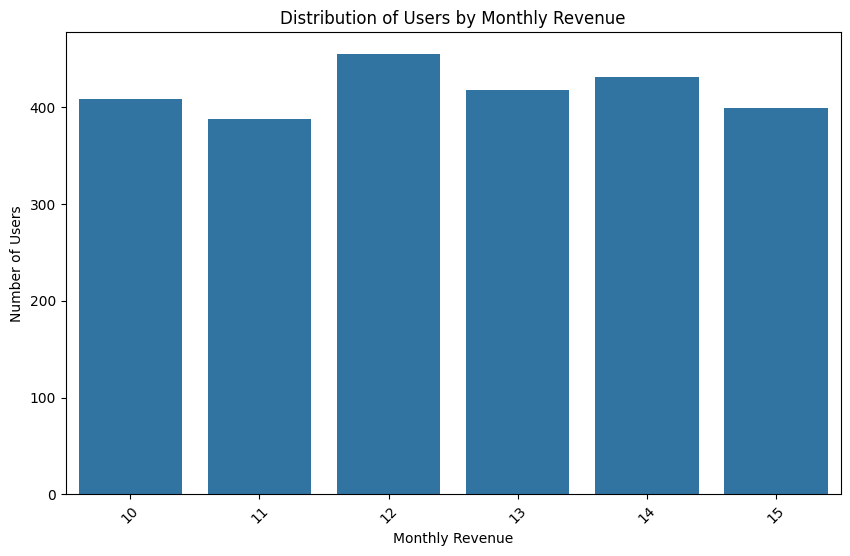

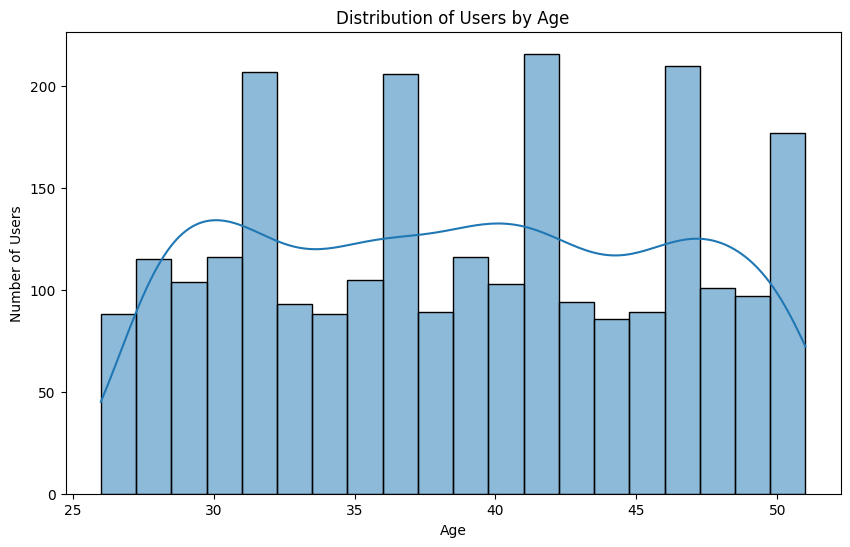

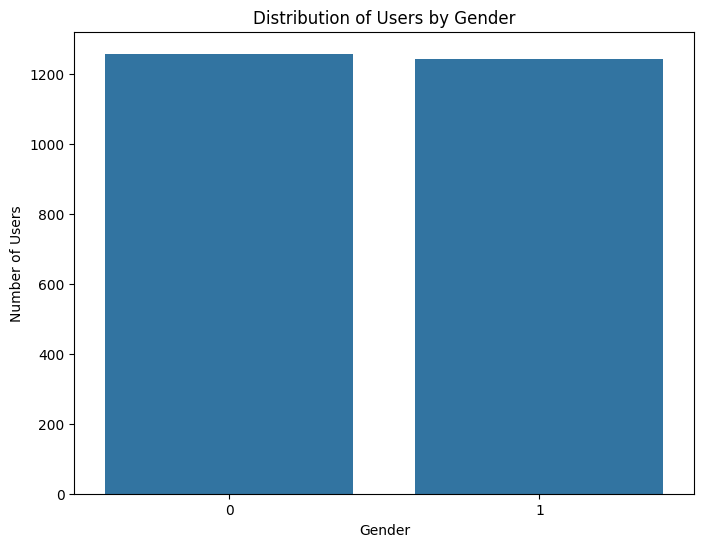

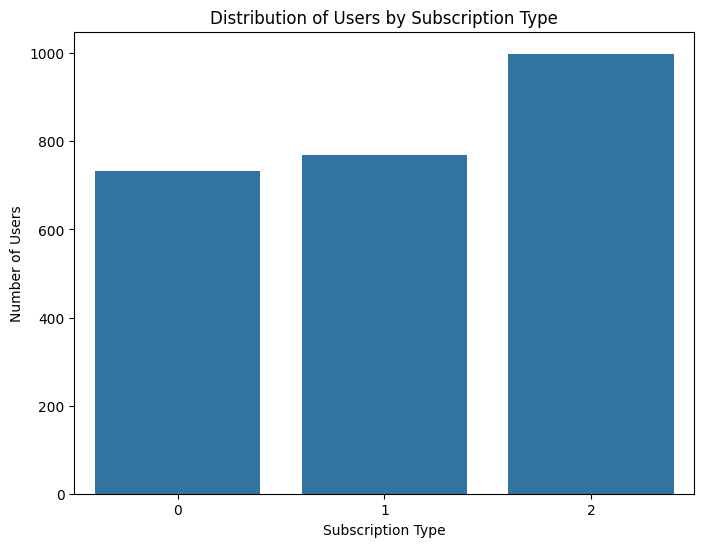

In [ ]:

# The distribution of users by Country
plt.figure(figsize=(10, 6))
sns.countplot(x='Monthly Revenue', data=df)
plt.title('Distribution of Users by Monthly Revenue')
plt.xlabel('Monthly Revenue')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.show()

# Plot the distribution of users by Age
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Distribution of Users by Age')
plt.xlabel('Age')
plt.ylabel('Number of Users')
plt.show()

# Plot the distribution of users by Gender
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=df)
plt.title('Distribution of Users by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Users')
plt.show()

# Plot the distribution of users by Subcription Type
plt.figure(figsize=(8, 6))
sns.countplot(x='Subscription Type', data=df)
plt.title('Distribution of Users by Subscription Type')
plt.xlabel('Subscription Type')
plt.ylabel('Number of Users')
plt.show()

# **Part 3: Linear Regression Model (Predicting Monthly Revenue)**

# **Build the Model:**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(Xline, Yline, test_size=0.2, random_state=42)
Model = LinearRegression()
Model.fit(X_train, Y_train)

LinearRegression()

# **Model Evaluation:**

In [ ]:
feature_values = {'Engagement_Score': 17, 'Feedback': 1, 'Days_Since_Join': 500}
feature_df = pd.DataFrame(feature_values, index=[0])
predicted_revenue = Model.predict(feature_df)
print("Predicted Monthly Revenue:", predicted_revenue[0])

Y_pred = Model.predict(X_test)

r_squared = r2_score(Y_test, Y_pred)
print("R-squared:", r_squared)

rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
print("RMSE:", rmse)

Predicted Monthly Revenue: 15.082154618225152
R-squared: 0.8123833677068518
RMSE: 0.7198794389259309


# **Part 4: Logistic Regression Model (Predicting Customer Feedback)**

# **Model Building:**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(xlog, ylog, test_size=0.2, random_state=42)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

model = LogisticRegression()
model.fit(x_train_scaled, y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(x_test_scaled)

# **Evaluation:**

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("confusion matrix: ")
print(conf_matrix)
print("classification report: ")
print(class_report)

Accuracy: 0.892
confusion matrix: 
[[227  24]
 [ 30 219]]
classification report: 
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       251
           1       0.90      0.88      0.89       249

    accuracy                           0.89       500
   macro avg       0.89      0.89      0.89       500
weighted avg       0.89      0.89      0.89       500



# **Part 5: Comparative Analysis and Visualization**

**Feature Importance:**

**Linear Regression**

Engagement_Score: 0.6867001955980498
Feedback: 0.5622236531751688
Days_Since_Join: -0.00010111025292647291


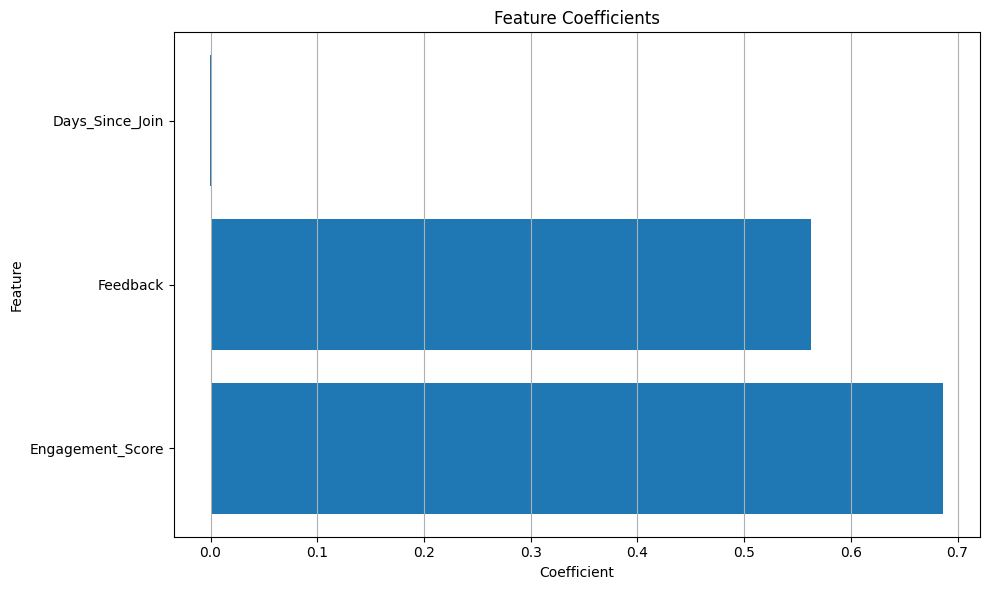

In [ ]:
coefficients = Model.coef_
feature_names = Xline.columns

for feature, coef in zip(feature_names, coefficients):
    print(f"{feature}: {coef}")

plt.figure(figsize=(10, 6))
plt.barh(feature_names, coefficients)
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Feature Coefficients')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

**Logistic Regression**

Engagement_Score: 0.04669364809287405
Feedback: 3.721296696354047
Subscription Type: 0.0014954962231742714


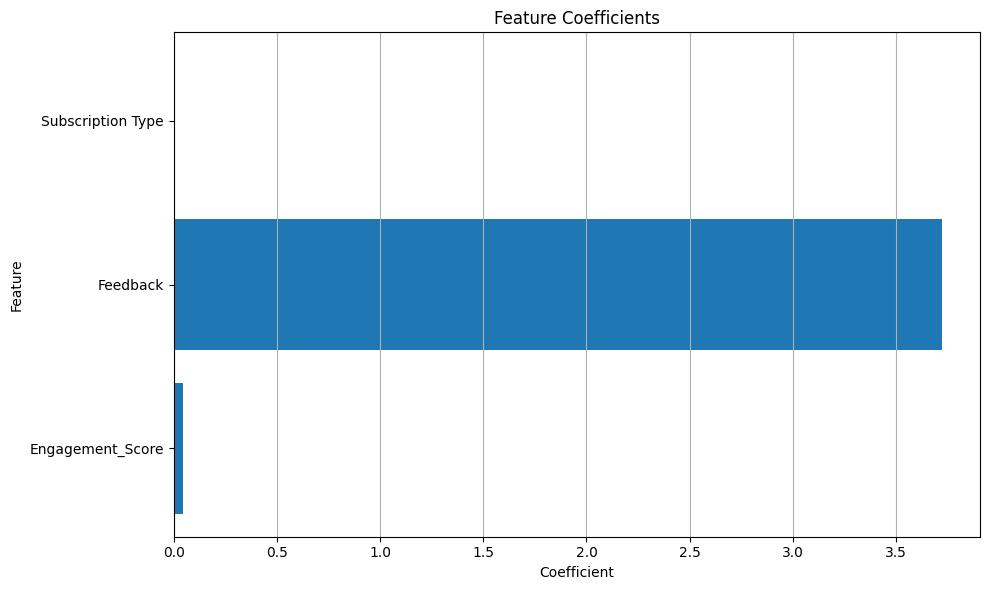

In [ ]:
coefficientss = model.coef_[0]
feature_namess = ['Engagement_Score', 'Feedback', 'Subscription Type']

coefficients_dict = dict(zip(feature_namess, coefficientss))
selected_coefficients = [coefficients_dict[feature] for feature in feature_namess]

for feature, coef in zip(feature_namess, coefficientss):
    print(f"{feature}: {coef}")

plt.figure(figsize=(10, 6))
plt.barh(feature_namess, selected_coefficients)
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Feature Coefficients')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

# **Insights:**


Engagement Score: This factor seems to have a significant positive influence on Monthly Revenue. A higher engagement score indicates that customers are more actively involved with the product or service. This increased engagement likely translates to higher levels of interaction with the revenue-generating aspects of the business, such as making purchases or subscribing to premium services. Businesses could focus on strategies to enhance customer engagement, such as personalized communication, loyalty programs, or interactive features, to potentially boost Monthly Revenue.

Feedback: The positive coefficient for Feedback suggests that it also has a notable impact on Monthly Revenue, albeit slightly less than Engagement Score. Positive feedback from customers often indicates satisfaction with the product or service, which can lead to increased loyalty, repeat purchases, and positive word-of-mouth recommendations. Therefore, businesses should actively seek feedback from customers and use it to improve their offerings, enhance customer experience, and ultimately drive higher Monthly Revenue.

Days Since Join: Interestingly, Days Since Join has a very small negative coefficient, indicating a slight negative influence on Monthly Revenue. This suggests that as the duration since a customer's initial sign-up increases, there may be a slight decrease in their contribution to Monthly Revenue. It's possible that over time, customer interest may wane, or they may become less active users, resulting in reduced spending.


Feedback: The coefficient for feedback is notably high, indicating that it has a substantial impact on itself. In other words, customers who have provided feedback in the past are more likely to continue doing so.

Engagement Score: Although the coefficient for engagement score is lower compared to feedback, it still demonstrates a positive influence on feedback. This implies that customers with higher engagement scores are more likely to provide feedback.

Subscription Type: The coefficient for subscription type is relatively small in comparison to feedback and engagement score. However, it still suggests a positive relationship between subscription type and feedback. This implies that customers with certain subscription plans may be more inclined to provide feedback.
